In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
sns.set_theme(style='darkgrid', palette='colorblind')
df = pd.read_csv('global_energy_consumption.csv')
df.dtypes

Unnamed: 0                                                            int64
Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking (% of population)                 float64
Renewable electricity Generating Capacity per capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy inten

In [4]:
df = df.drop(columns = ['Latitude', 'Longitude']).copy()

In [20]:
world_co2_emission_by_year = df.groupby('Year')['CO2 emissions value by country (kT)'].sum()
world_co2_emission_by_year = world_co2_emission_by_year.reset_index()
world_co2_emission_by_year.rename(columns={'CO2 emissions value by country (kT)':'Worldwide CO2 Emission (kT)'},inplace=True)
print(world_co2_emission_by_year)


    Year  Worldwide CO2 Emission (kT)
0   2000                 2.000025e+07
1   2001                 2.035440e+07
2   2002                 2.063615e+07
3   2003                 2.164957e+07
4   2004                 2.269906e+07
5   2005                 2.357016e+07
6   2006                 2.431461e+07
7   2007                 2.533484e+07
8   2008                 2.550101e+07
9   2009                 2.524682e+07
10  2010                 2.684441e+07
11  2011                 2.768419e+07
12  2012                 2.809390e+07
13  2013                 2.878599e+07
14  2014                 2.883242e+07
15  2015                 2.861195e+07
16  2016                 2.861067e+07
17  2017                 2.895609e+07
18  2018                 2.959246e+07
19  2019                 2.961095e+07
20  2020                 0.000000e+00


29610950.034653205


<AxesSubplot:title={'center':'Worldwide CO2 Emission (kT) Over the Years'}, xlabel='Year', ylabel='Worldwide CO2 Emission (kT)'>

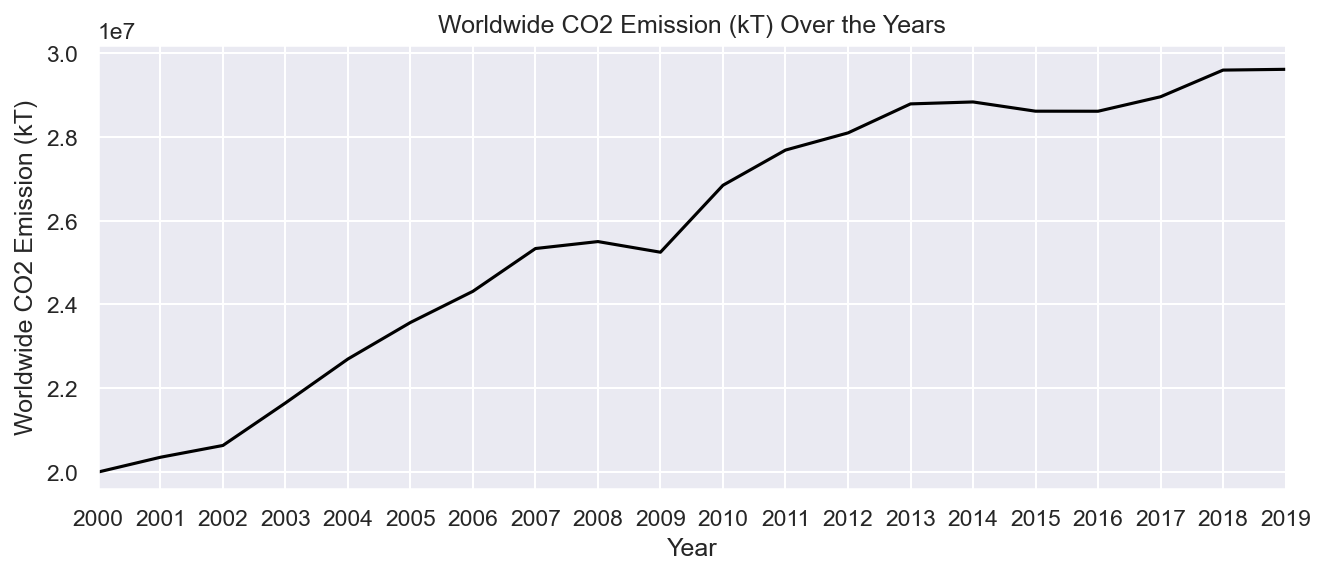

In [21]:
def plot_trend(df, item):
    df=df[df['Year']!=2020]
    plt.figure(figsize = (9,4),dpi=150)
    fig = sns.lineplot(data = df, x = 'Year', y =item, color = 'black')
    plt.title(item+' Over the Years')
    plt.xlabel('Year')
    plt.ylabel(item)

    plt.xticks(df['Year'], rotation = 0, ha = 'center')
    plt.xlim(2000, 2019) #2020 doesn't containt data and will be predicted later
    print(df[item].max())
    plt.ylim(df[item].min()*0.98,df[item].max()*1.02)
    plt.tight_layout()
    # plt.show()
    return fig

# plt.figure(figsize = (10, 6),dpi=100)
# sns.lineplot(data = world_co2_emission_by_year, x = 'Year', y = 'Worldwide CO2 Emission', color = 'black')
# plt.title('Worldwide CO2 Emissions Over the Years')
# plt.xlabel('Year')
# plt.ylabel('Worldwide CO2 Emissions (kT)')

# plt.xticks(world_co2_emission_by_year['Year'], rotation = 0, ha = 'center')
# plt.xlim(2000, 2019) #2020 doesn't containt data and will be predicted later
# plt.ylim(1.5e7,3e7)
# plt.tight_layout()
# plt.show()
plot_trend(world_co2_emission_by_year, 'Worldwide CO2 Emission (kT)' )

4618167.3752999995


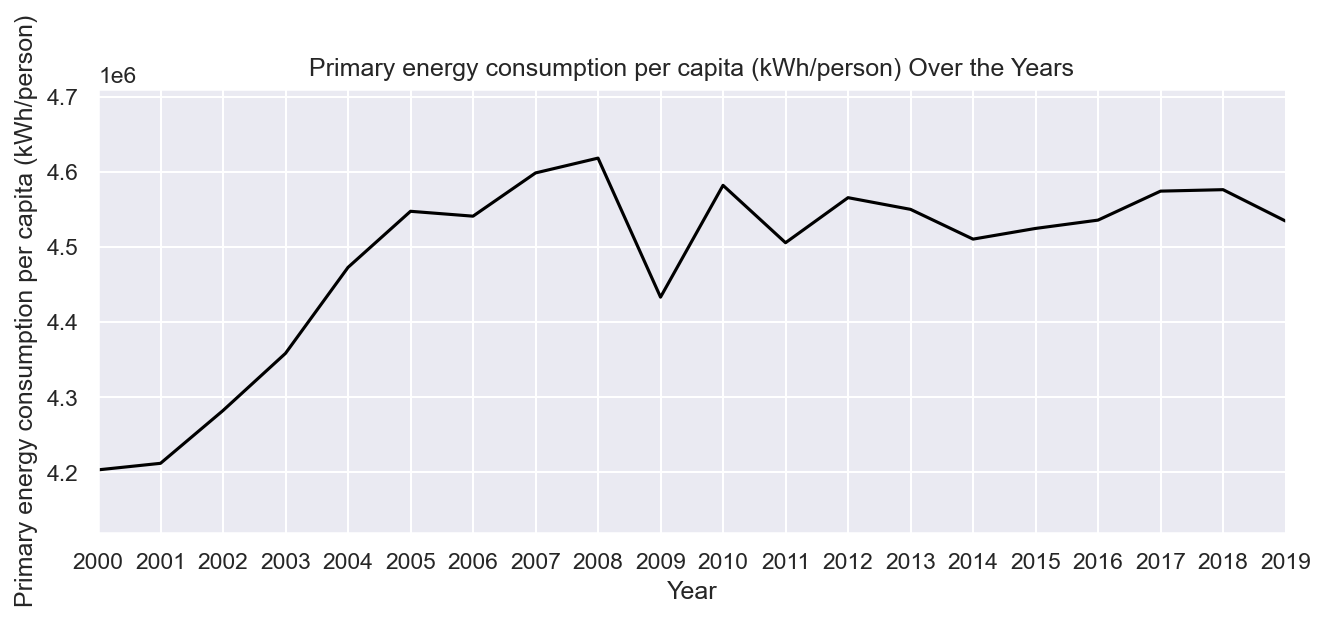

In [22]:
energy_consumption_per_person_by_year = df.groupby('Year')['Primary energy consumption per capita (kWh/person)'].sum()
energy_consumption_per_person_by_year = energy_consumption_per_person_by_year.reset_index()
fig_energy_consumption_trend = plot_trend(energy_consumption_per_person_by_year, 'Primary energy consumption per capita (kWh/person)' )
# fig_energy_consumption_trend.text(1998, -4, 'negative change rate caused\nby economic crisis 2008-2009.', bbox=dict(facecolor='yellow', alpha=0.85))

# # plt.show()

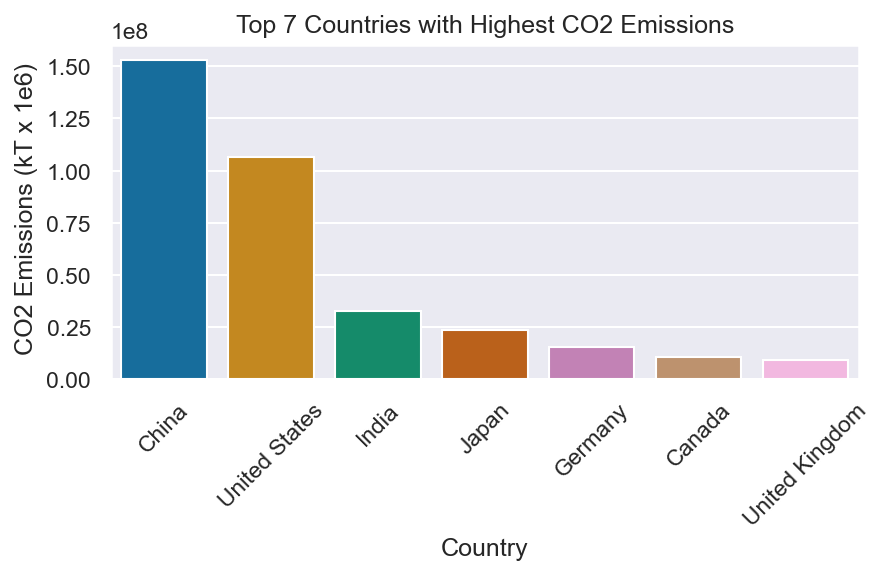

In [26]:
co2_emission_by_country = df.groupby('Entity')['CO2 emissions value by country (kT)'].sum()
top_7_countries = co2_emission_by_country.nlargest(7)
plt.figure(figsize = (6,4),dpi=150)
sns.barplot(x = top_7_countries.index, y = top_7_countries.values)
plt.xlabel('Country')
plt.ylabel(' CO2 Emissions (kT x 1e6)')
plt.title('Top 7 Countries with Highest CO2 Emissions')

plt.xticks(rotation = 45, ha = 'center')

plt.tight_layout()
plt.show()

In [28]:
corr_subset = df.drop(columns=['Entity', 'Year'])
corr_matrix = corr_subset.corr()
corr_values = corr_matrix.values.tolist()
corr_columns = corr_matrix.columns.tolist()
fig = go.Figure(data = go.Heatmap(z = corr_values,
                                x = corr_columns,
                                y = corr_columns,
                                colorscale = 'RdBu',
                                zmin = -1,
                                zmax = 1,
                                colorbar_title = 'Legend'))
fig.update_layout(title = 'Correlation Heatmap', width = 1000, height = 1000)
fig.show()
